#**Project - Pneumonia Detection from chest X-ray Images**

### **Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Import Libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import cv2
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential,load_model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, GlobalAveragePooling2D
import tensorflow as tf
#from keras_flops import get_flops
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1,EfficientNetB2, EfficientNetB3, EfficientNetB4 
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model, Sequential,load_model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
from keras.applications import DenseNet121
import numpy as np
from PIL import Image
from IPython.display import display,clear_output
from keras.optimizers import Adam, RMSprop,SGD
from tensorflow.keras.utils import normalize
from warnings import filterwarnings
%matplotlib inline

# **Load Dataset**

In [ ]:
labels = ['NORMAL','PNEUMONIA']

In [ ]:
dataset = []
label = []

image_size = 224
print("DataSet")
print("============")
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/DNN/Chest_X-ray/BT_Dataset_without_DA',i)
    for j in tqdm(os.listdir(folderPath)):
        # reading the images using cv2 library
        img = cv2.imread(os.path.join(folderPath,j))
        # Image resizing
        img = cv2.resize(img,(image_size, image_size))
        dataset.append(img)
        label.append(i)
                
dataset = np.array(dataset)
label = np.array(label) #.reshape((-1, 1))

DataSet


100%|██████████| 4273/4273 [00:42<00:00, 100.84it/s]


In [ ]:
# Balanced normal augmented x2
dataset2 = []
label = []

image_size = 224
print("DataSet")
print("============")
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/DNN/Chest_X-ray/Balanced_aug_dataset',i)
    for j in tqdm(os.listdir(folderPath)):
        # reading the images using cv2 library
        img = cv2.imread(os.path.join(folderPath,j))
        # Image resizing
        img = cv2.resize(img,(image_size, image_size))
        dataset2.append(img)
        label.append(i)
                
dataset2 = np.array(dataset2)
label = np.array(label) #.reshape((-1, 1))

DataSet


100%|██████████| 4273/4273 [01:37<00:00, 43.99it/s] 


## **Plot Sample Images**

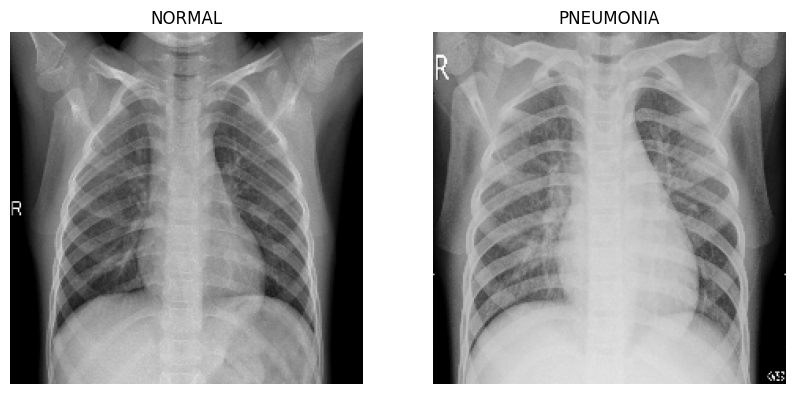

In [ ]:
# Displaying sample images from bith classes
k=0
fig, ax = plt.subplots(1,2,figsize=(10,10))

for i in labels:
    j=3
    while True :
        if label[j]==i:
            ax[k].imshow(dataset[j])
            ax[k].set_title(label[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

## **Data Shuffling & Normalization**

In [ ]:
dataset, label = shuffle(dataset,label, random_state=101)

In [ ]:
# normalize dataset
dataset = dataset.astype('float32') 
dataset /= 255

In [ ]:
print("dataset=",dataset.shape)
print("label=",label.shape)

dataset= (5856, 224, 224, 3)
label= (5856,)


### **Splitting dataset into Train and Test Set**

In [ ]:
#Spliting dataset 80% for training and 20% for testing
X_train,X_test,y_train,y_test=train_test_split(dataset,label,test_size=0.2,random_state = 3, shuffle=True)
X_train = normalize( X_train, axis =1)
X_test = normalize( X_test, axis =1)
print("X train=",X_train.shape)
print("Y train=",y_train.shape)

print("X test=",X_test.shape)
print("Y test=",y_test.shape)

X train= (4684, 224, 224, 3)
Y train= (4684,)
X test= (1172, 224, 224, 3)
Y test= (1172,)


## **Data Shuffling & Normalization : balanced NORMAL DA X2**

In [ ]:
dataset2, label = shuffle(dataset2,label, random_state=101)

In [ ]:
# normalize dataset
dataset2 = dataset2.astype('float32') 
dataset2 /= 255

In [ ]:
print("dataset2=",dataset2.shape)
print("label=",label.shape)

dataset2= (9038, 224, 224, 3)
label= (9038,)


### **Splitting dataset into Train and Test Set**





In [ ]:
#Spliting dataset 80% for training and 20% for testing
X_train2,X_test2,y_train2,y_test2=train_test_split(dataset2,label,test_size=0.2,random_state = 3, shuffle=True)
X_train2 = normalize( X_train2, axis =1)
X_test2 = normalize( X_test2, axis =1)
print("X train=",X_train2.shape)
print("Y train=",y_train2.shape)

print("X test=",X_test2.shape)
print("Y test=",y_test2.shape)

X train= (7230, 224, 224, 3)
Y train= (7230,)
X test= (1808, 224, 224, 3)
Y test= (1808,)


## **Label Encoding**

In [ ]:
# label encoding - one hot encoding

y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = [] 
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

<Axes: ylabel='count'>

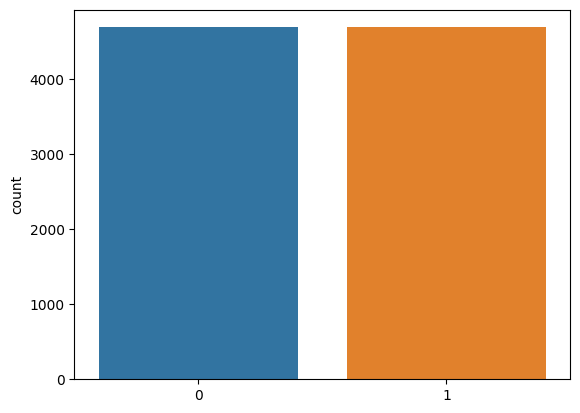

In [ ]:
#Ploting the no.of samples in train data
sns.countplot(y_train)

<Axes: ylabel='count'>

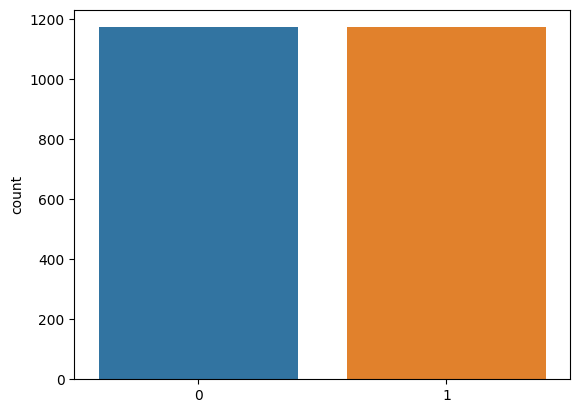

In [ ]:
#Ploting the no.of samples in test data
sns.countplot(y_test)

## **Label Encoding Balance NORMAL x2**

In [ ]:
# label encoding - one hot encoding

y_train_new2 = []
for i in y_train2:
    y_train_new2.append(labels.index(i))
y_train2 = y_train_new2
y_train2 = tf.keras.utils.to_categorical(y_train2)


y_test_new2 = [] 
for i in y_test2:
    y_test_new2.append(labels.index(i))
y_test2 = y_test_new2
y_test2 = tf.keras.utils.to_categorical(y_test2)

<Axes: ylabel='count'>

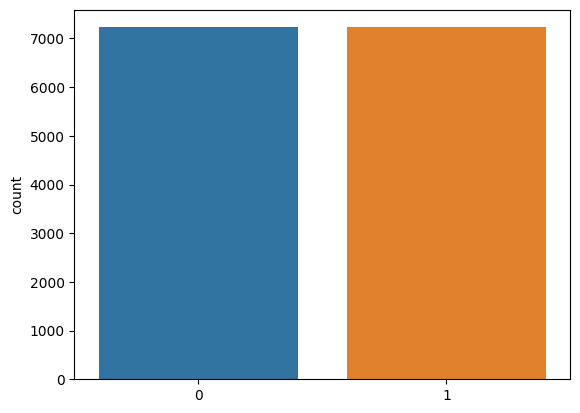

In [ ]:
#Ploting the no.of samples in train2 data
sns.countplot(y_train2)

<Axes: ylabel='count'>

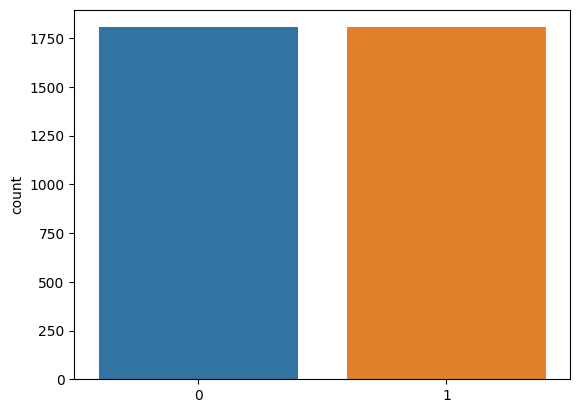

In [ ]:
#Ploting the no.of samples in test data
sns.countplot(y_test2)

# **CNN Models from Scratch**

## **Model 01 - CNN model from scratch with Three Layers**

In [ ]:
# Define the CNN model architecture
model = tf.keras.Sequential([
    #Layer 1
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2,2)), # I will write here about the detail of max pooling
    #Layer 2
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    #Layer 3
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    #FC 1
    layers.Dense(64, activation='relu'),
    #FC 2
    layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/DNN/Chest_X-ray/Implementation/Saved_Models/Model1_CNN.h5",
                             monitor="val_loss",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)

#### **Training The Model**

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.1, shuffle = True, epochs = 100, verbose=1, batch_size=32,
                   callbacks=[checkpoint,reduce_lr])

In [ ]:
#saving the trained model
model.save('/content/drive/MyDrive/DNN/Chest_X-ray/Implementation/Saved_Models/model1_CNN.h5')

### **Model Training and Validation Curves and Loss Curves**

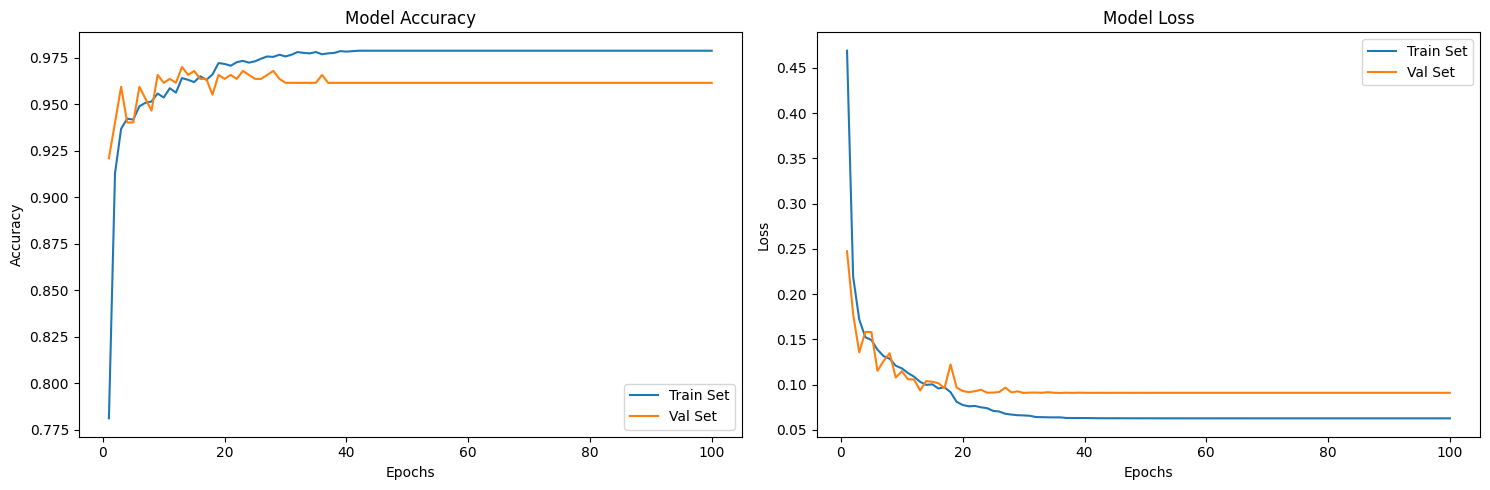

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

### **Prediction on test data**

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

37/37 [==============================] - 1s 26ms/step


### **Evaluation on Test Data**

In [ ]:
loss,acc = model.evaluate(X_test,y_test,verbose = 1)
print("Test Accuracy: ",np.round(acc*100,2))

37/37 [==============================] - 1s 19ms/step - loss: 0.1576 - accuracy: 0.9428
Test Accuracy:  94.28


In [ ]:
#Classification Report
print(classification_report(y_test_new,pred,target_names = labels, digits = 4))

              precision    recall  f1-score   support

      NORMAL     0.9180    0.8765    0.8968       332
   PNEUMONIA     0.9520    0.9690    0.9605       840

    accuracy                         0.9428      1172
   macro avg     0.9350    0.9228    0.9286      1172
weighted avg     0.9424    0.9428    0.9424      1172



### **Confusion Matrix**

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

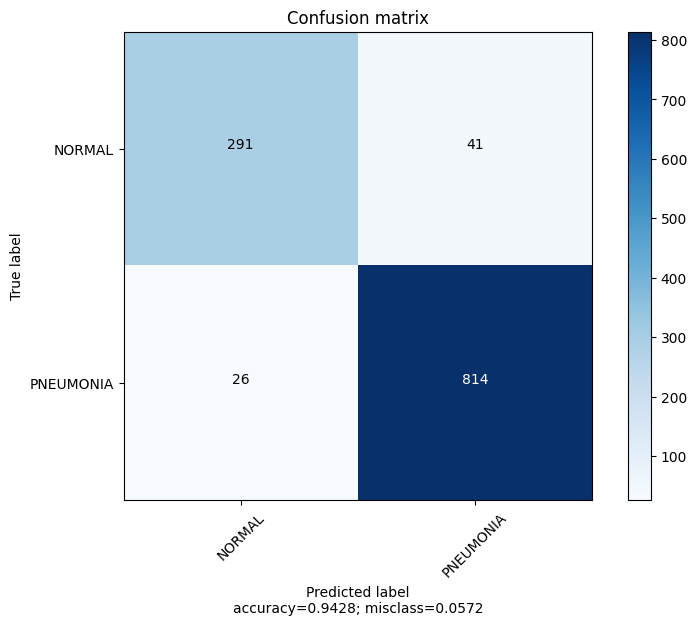

In [ ]:
confusion_mtx = confusion_matrix(y_test_new,pred)
cm = plot_confusion_matrix(confusion_mtx, target_names = labels, normalize=False)

### **RoC Curve**

37/37 [==============================] - 1s 18ms/step


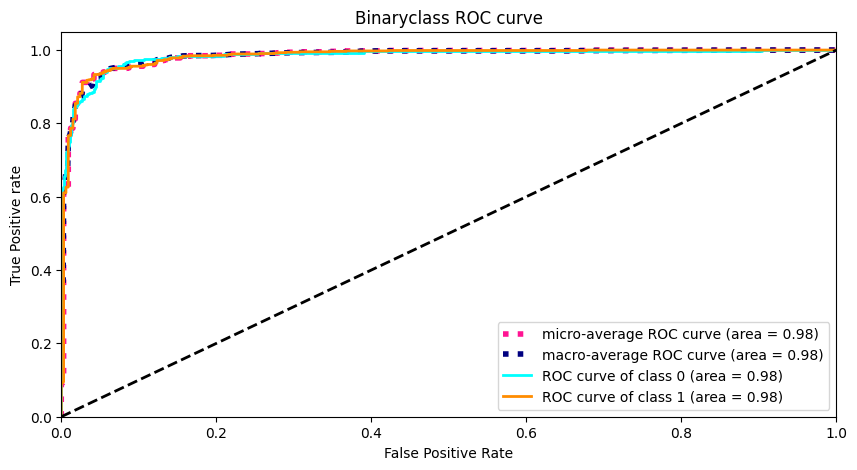

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle

pred = model.predict(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_new, pred[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_new, pred[:,i],pos_label = i)    
# Compute micro-average ROC curve and ROC area

roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_class):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_class

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure(figsize = (10,5))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_class), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Binaryclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/DNN/Chest_X-ray/Implementation/Saved_Models/CNN_model_1_ROC_1',dpi = 400);


## **Model 01 - CNN model from scratch with Three Layers - balanced data**

In [ ]:
# Define the CNN model architecture
model = tf.keras.Sequential([
    #Layer 1
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2,2)), # I will write here about the detail of max pooling
    #Layer 2
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    #Layer 3
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    #FC 1
    layers.Dense(64, activation='relu'),
    #FC 2
    layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/DNN/Chest_X-ray/Implementation/Saved_Models/Model1_CNN.h5",
                             monitor="val_loss",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)

## **Training the Model**

In [ ]:
history = model.fit(X_train2,y_train2,validation_split=0.1, shuffle = True, epochs = 100, verbose=1, batch_size=32,
                   callbacks=[checkpoint,reduce_lr])

In [ ]:
#saving the trained model
model.save('/content/drive/MyDrive/DNN/Chest_X-ray/Implementation/Saved_Models/model1_balanced_CNN.h5')

## **Model Training and Validation Curves and Loss Curves**

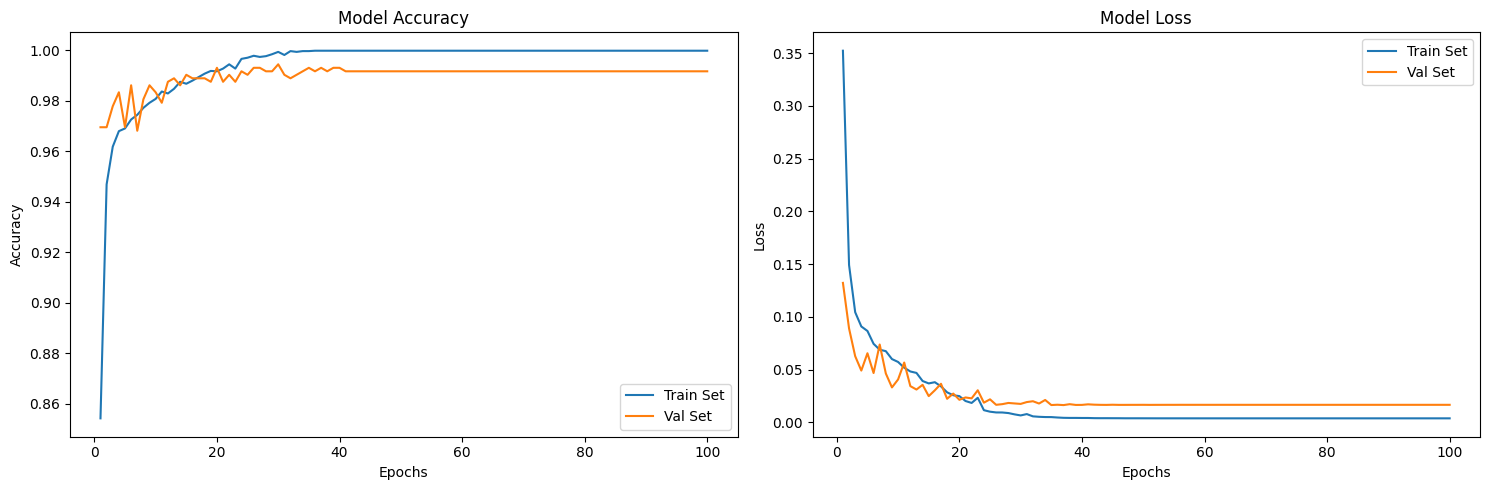

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

## **Prediction on Test data**

In [ ]:
pred = model.predict(X_test2)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test2,axis=1)

57/57 [==============================] - 18s 318ms/step


## **Evaluation on Test data**

In [ ]:
loss,acc = model.evaluate(X_test2,y_test2,verbose = 1)
print("Test Accuracy: ",np.round(acc*100,2))

57/57 [==============================] - 17s 302ms/step - loss: 0.0546 - accuracy: 0.9856
Test Accuracy:  98.56


In [ ]:
#Classification Report
print(classification_report(y_test_new2,pred,target_names = labels, digits = 4))

              precision    recall  f1-score   support

      NORMAL     0.9873    0.9852    0.9863       947
   PNEUMONIA     0.9837    0.9860    0.9849       858

    accuracy                         0.9856      1805
   macro avg     0.9855    0.9856    0.9856      1805
weighted avg     0.9856    0.9856    0.9856      1805



## **Confusion Matrix**

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

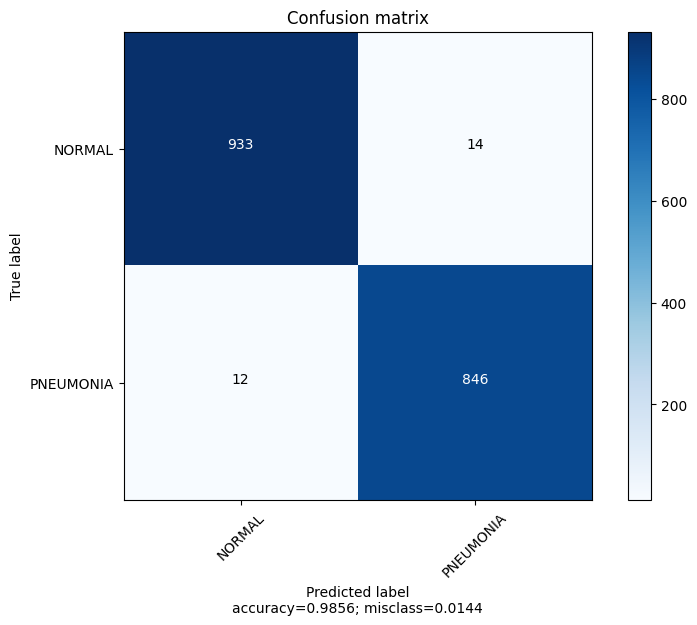

In [ ]:
confusion_mtx = confusion_matrix(y_test_new2,pred)
cm = plot_confusion_matrix(confusion_mtx, target_names = labels, normalize=False)

57/57 [==============================] - 18s 318ms/step


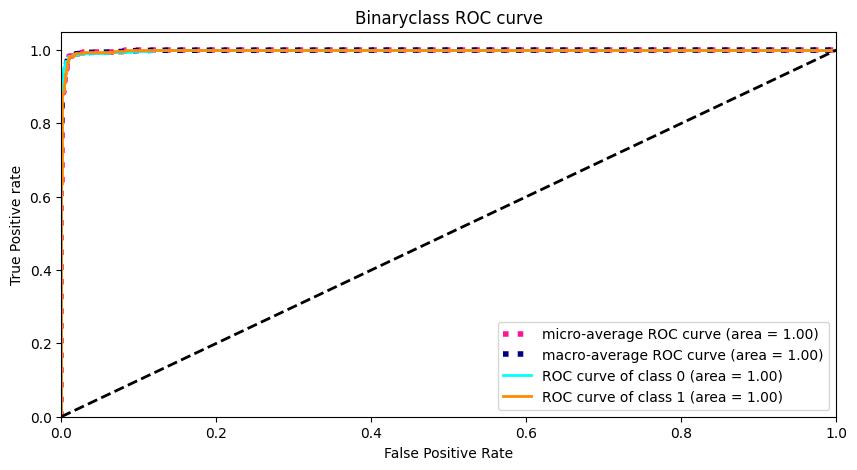

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle

pred = model.predict(X_test2)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_new2, pred[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_new2, pred[:,i],pos_label = i)    
# Compute micro-average ROC curve and ROC area

roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_class):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_class

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure(figsize = (10,5))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_class), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Binaryclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/DNN/Chest_X-ray/Implementation/Saved_Models/CNN_model_1_ROC_1',dpi = 400);

## **RoC Curve**

## **Model 02 - CNN model from scratch with Four Layers**

In [ ]:
# Define the input shape
input_shape = (224, 224, 3)

# Define the model
cnn_model = tf.keras.Sequential([
    # Convolutional layer 1
    layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),

    # Convolutional layer 2
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),

    # Convolutional layer 3
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),

    # Convolutional layer 4
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),

    layers.Flatten(),

    # FC Layer
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(2, activation='sigmoid')
])

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 16)     64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                        

In [ ]:
# Compile the model with binary cross-entropy loss and Adam optimizer
cnn_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Project/Chest_X-ray/Implementation/Saved_Models/Model2_CNN.h5",monitor="val_loss",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)

### **Training The Model**

In [ ]:
history = cnn_model.fit(X_train2,y_train2,validation_split=0.1, shuffle = True, epochs = 100, verbose=1, batch_size=32,
                   callbacks=[checkpoint,reduce_lr])

In [ ]:
#saving the trained model
cnn_model.save('/content/drive/MyDrive/DNN/Chest_X-ray/Implementation/Saved_Models/model2_CNN.h5')

### **Model Training and Validation Curves and Loss Curves**

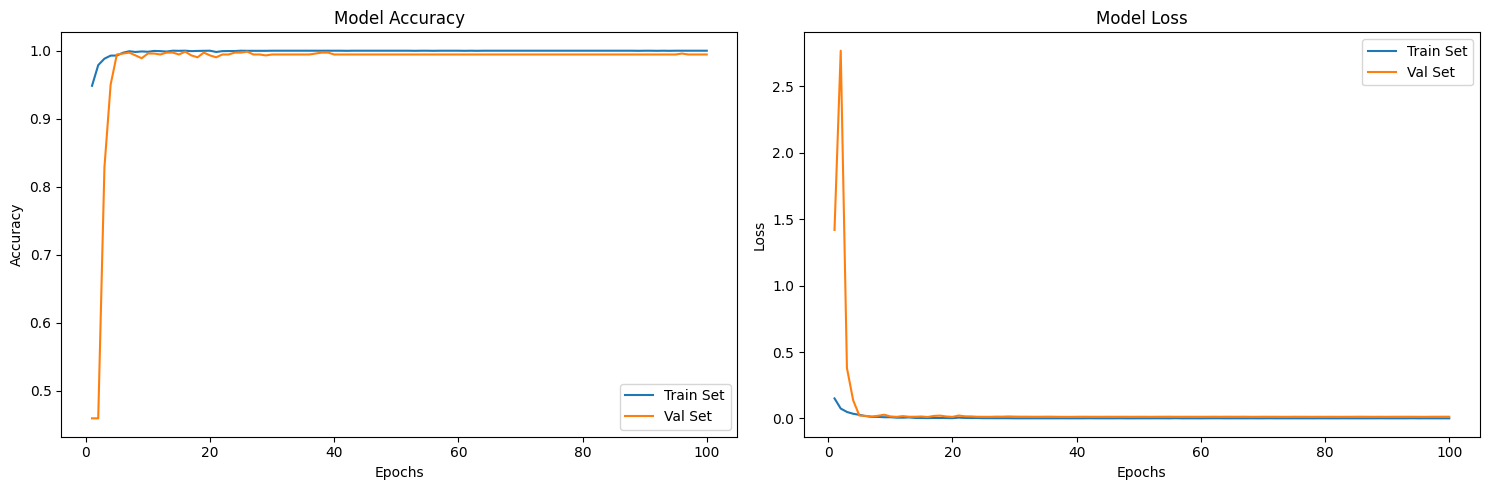

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

### **Prediction on Test Data**

In [ ]:
pred = cnn_model.predict(X_test2)
pred = np.argmax(pred,axis=1)
y_test_new2 = np.argmax(y_test2,axis=1)

57/57 [==============================] - 1s 9ms/step


### **Evaluation on Test Data**

In [ ]:
loss,acc = cnn_model.evaluate(X_test2,y_test2,verbose = 1)
print("Test Accuracy: ",np.round(acc*100,2))

57/57 [==============================] - 0s 8ms/step - loss: 0.0300 - accuracy: 0.9895
Test Accuracy:  98.95


In [ ]:
print(classification_report(y_test_new2,pred,target_names = labels, digits = 4))

              precision    recall  f1-score   support

      NORMAL     0.9884    0.9915    0.9900       946
   PNEUMONIA     0.9907    0.9872    0.9890       862

    accuracy                         0.9895      1808
   macro avg     0.9895    0.9894    0.9895      1808
weighted avg     0.9895    0.9895    0.9895      1808



### **Confusion Matrix**

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

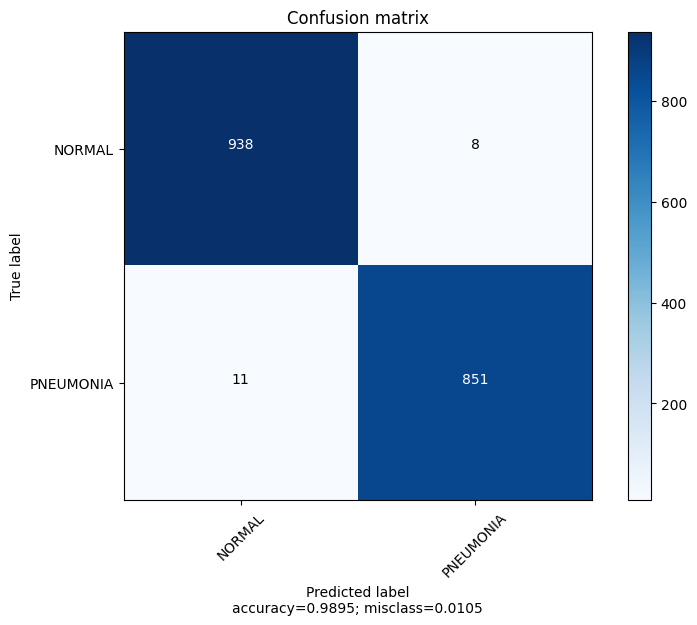

In [ ]:
confusion_mtx = confusion_matrix(y_test_new2,pred)
cm = plot_confusion_matrix(confusion_mtx, target_names = labels, normalize=False)

### **RoC Curve**

57/57 [==============================] - 0s 7ms/step


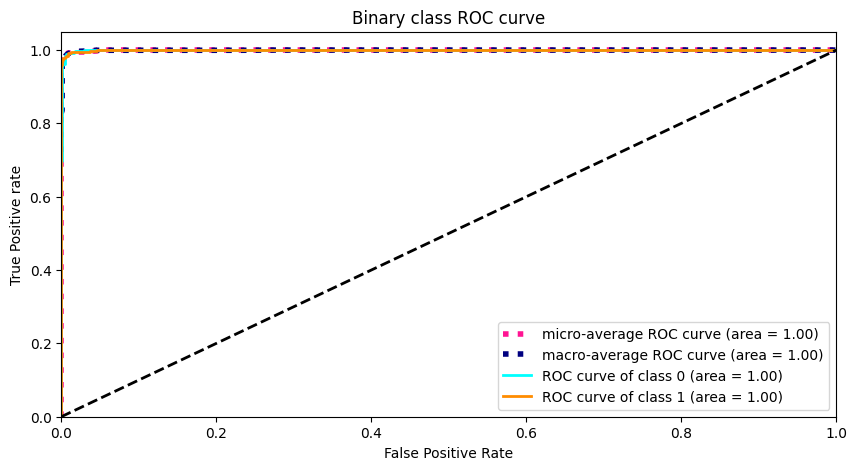

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle

pred = cnn_model.predict(X_test2)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_new2, pred[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_new2, pred[:,i],pos_label = i)    
# Compute micro-average ROC curve and ROC area

roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_class):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_class

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure(figsize = (10,5))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_class), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Binary class ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/Project/Chest_X-ray/Implementation/Saved_Models/CNN_model_2_ROC_1',dpi = 400);

## **Model 03 - CNN model from scratch with Five Conv and 2 FC Layers**

In [ ]:
# Define input shape
input_shape = (224, 224, 3)
# Define the model
CNN_model = tf.keras.Sequential([
    # Convolutional layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    # Convolutional layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    # Convolutional layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    # Convolutional layer 4
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    # Convolutional layer 5
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    # Flatten the output from convolutional layers
    layers.Flatten(),
    # Fully connected layer 1
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    # Fully connected layer 2
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    # Output layer
    layers.Dense(2, activation='sigmoid')
])


In [ ]:
CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 111, 111, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                      

In [ ]:
# Compile the model with binary cross-entropy loss and Adam optimizer
CNN_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/DNN/Chest_X-ray/Implementation/Saved_Models/Model3_CNN.h5",monitor="val_loss",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)

### **Training The Model**

In [ ]:
history = CNN_model.fit(X_train2,y_train2,validation_split=0.1, shuffle = True, epochs = 100, verbose=1, batch_size=32,
                   callbacks=[checkpoint,reduce_lr])

In [ ]:
#saving the trained model
CNN_model.save('/content/drive/MyDrive/DNN/Chest_X-ray/Implementation/Saved_Models/model3_CNN.h5')

### **Model Training and Validation Curves and Loss Curves**

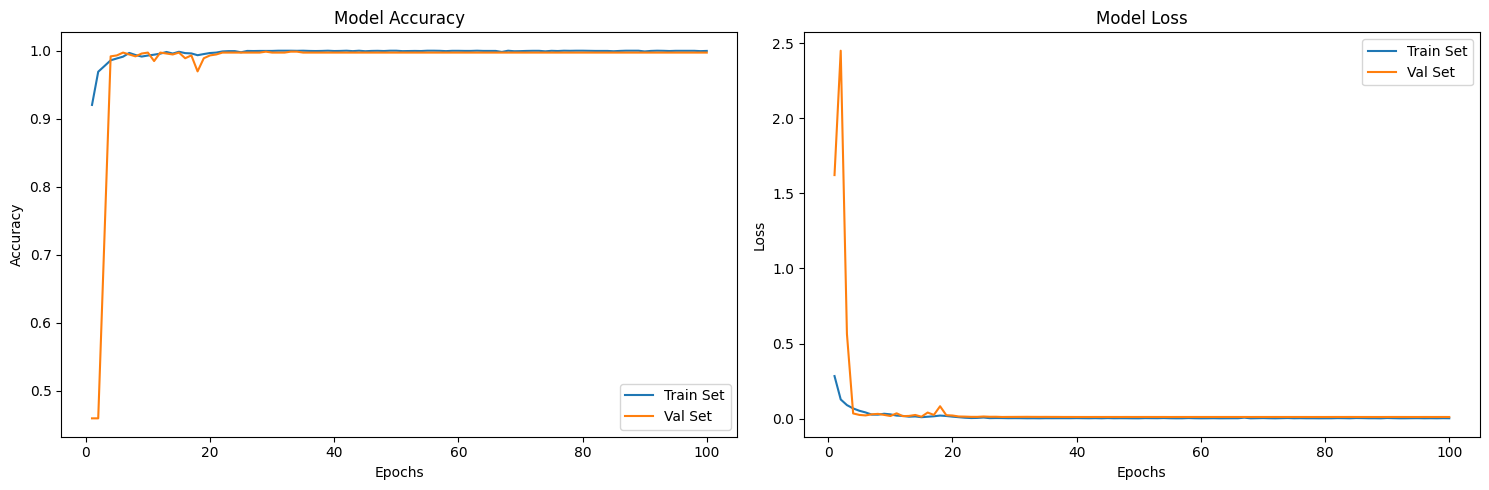

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

### **Prediction on Test Data**

In [ ]:
pred = CNN_model.predict(X_test2)
pred = np.argmax(pred,axis=1)
y_test_new2 = np.argmax(y_test2,axis=1)

57/57 [==============================] - 0s 8ms/step


### **Evaluation on Test Data**

In [ ]:
loss,acc = CNN_model.evaluate(X_test2,y_test2,verbose = 1)
print("Test Accuracy: ",np.round(acc*100,2))

57/57 [==============================] - 1s 10ms/step - loss: 0.0262 - accuracy: 0.9939
Test Accuracy:  99.39


In [ ]:
print(classification_report(y_test_new2,pred,target_names = labels, digits = 4))

              precision    recall  f1-score   support

      NORMAL     0.9947    0.9937    0.9942       946
   PNEUMONIA     0.9930    0.9942    0.9936       862

    accuracy                         0.9939      1808
   macro avg     0.9939    0.9939    0.9939      1808
weighted avg     0.9939    0.9939    0.9939      1808



### **Confusion Matrix**

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

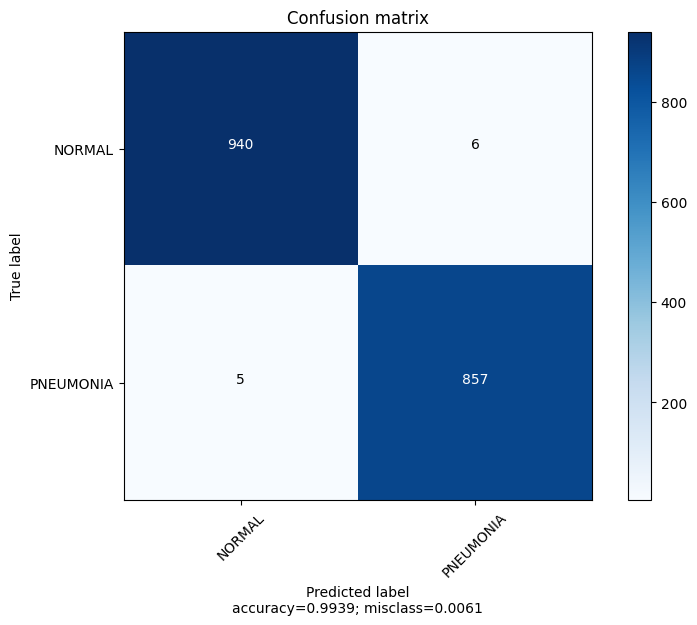

In [ ]:
confusion_mtx = confusion_matrix(y_test_new2,pred)
cm = plot_confusion_matrix(confusion_mtx, target_names = labels, normalize=False)

### **RoC Curve**

57/57 [==============================] - 0s 7ms/step


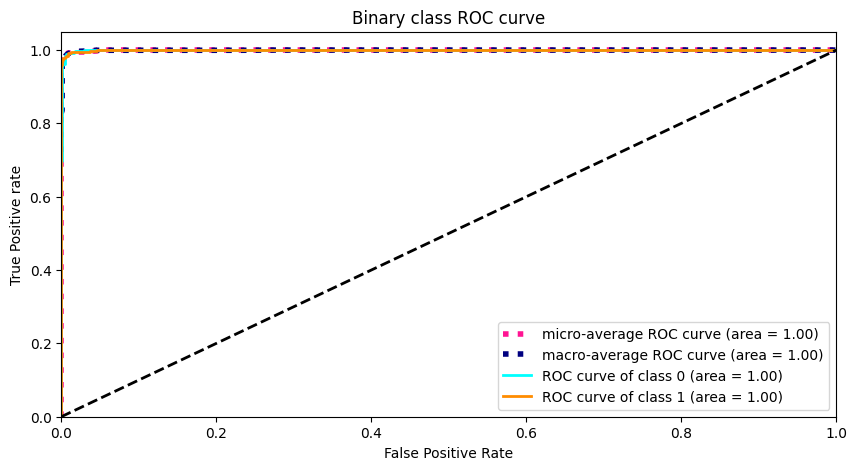

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle

pred = cnn_model.predict(X_test2)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_new2, pred[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_new2, pred[:,i],pos_label = i)    
# Compute micro-average ROC curve and ROC area

roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_class):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_class

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure(figsize = (10,5))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_class), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Binary class ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/Project/Chest_X-ray/Implementation/Saved_Models/CNN_model_2_ROC_1',dpi = 400);

# **Pretrained Models**

## **Model: Pre-trained - ResNet50**

In [ ]:
#Downloading Resnet50 model
resnet_model = ResNet50( weights = 'imagenet',include_top = False, input_shape = (image_size,image_size,3))
resnet_model.summary()

In [ ]:
#printing layers of the pretrained ResNet50 model
for i, layer in enumerate(resnet_model.layers):
    print(i, layer.name)

In [ ]:
#adding layers at the top of the classifier
model = resnet_model.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.2)(model)
model = tf.keras.layers.Dense(2,activation='sigmoid')(model)
model = tf.keras.models.Model(inputs=resnet_model.input, outputs = model)

In [ ]:
model.summary()

In [ ]:
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/DNN/Chest_X-ray/Implementation/Saved_Models/resnet50-{epoch}.h5"
,monitor="val_loss",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)

### **Training The Model**

In [ ]:
history = model.fit(X_train2,y_train2,validation_split = 0.1 , shuffle = True, epochs = 100, verbose=1, batch_size=32,
                   callbacks=[checkpoint,reduce_lr])

In [ ]:
#saving trained model
model.save("/content/drive/MyDrive/DNN/Chest_X-ray/Implementation/Saved_Models/resnet50_model.h5")

### **Model Training and Validation Curves and Loss Curves**

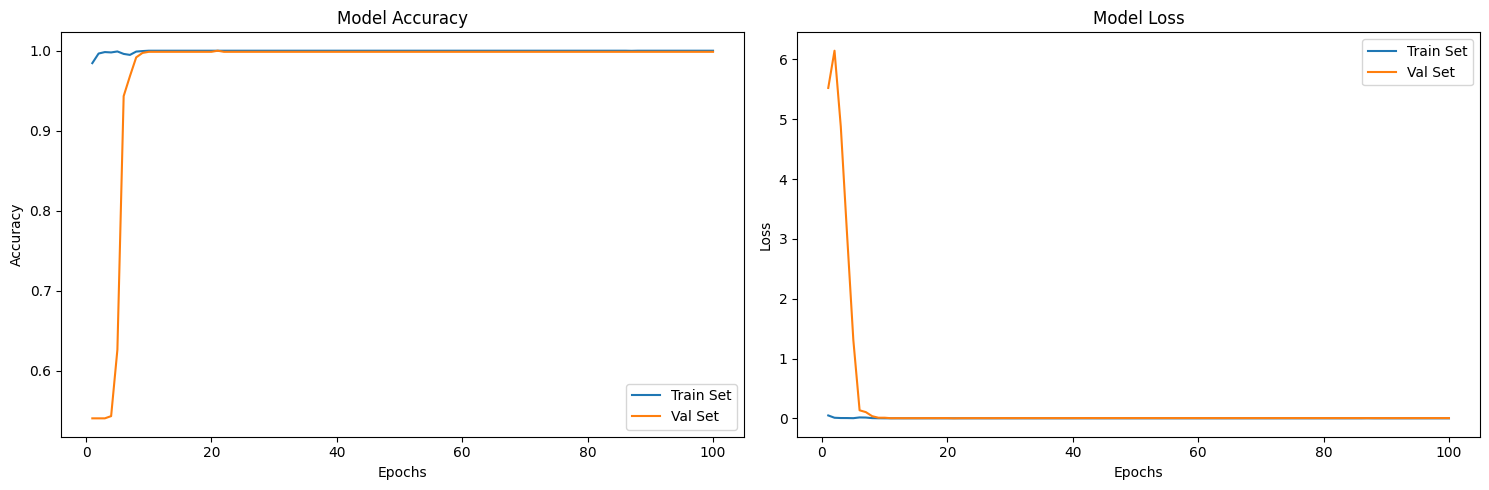

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

### **Prediction on Test Data**

In [ ]:
pred = model.predict(X_test2)
pred = np.argmax(pred,axis=1)
y_test_new2 = np.argmax(y_test2,axis=1)

57/57 [==============================] - 2s 21ms/step


### **Evaluation on Test Data**

In [ ]:
loss,acc = model.evaluate(X_test2,y_test2,verbose = 1)
print("Test Accuracy: ",np.round(acc*100,2))

57/57 [==============================] - 1s 19ms/step - loss: 0.0038 - accuracy: 0.9989
Test Accuracy:  99.89


In [ ]:
print(classification_report(y_test_new2,pred,target_names = labels, digits = 4))

              precision    recall  f1-score   support

      NORMAL     1.0000    0.9979    0.9989       946
   PNEUMONIA     0.9977    1.0000    0.9988       862

    accuracy                         0.9989      1808
   macro avg     0.9988    0.9989    0.9989      1808
weighted avg     0.9989    0.9989    0.9989      1808



### **Confusion Matrix**

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

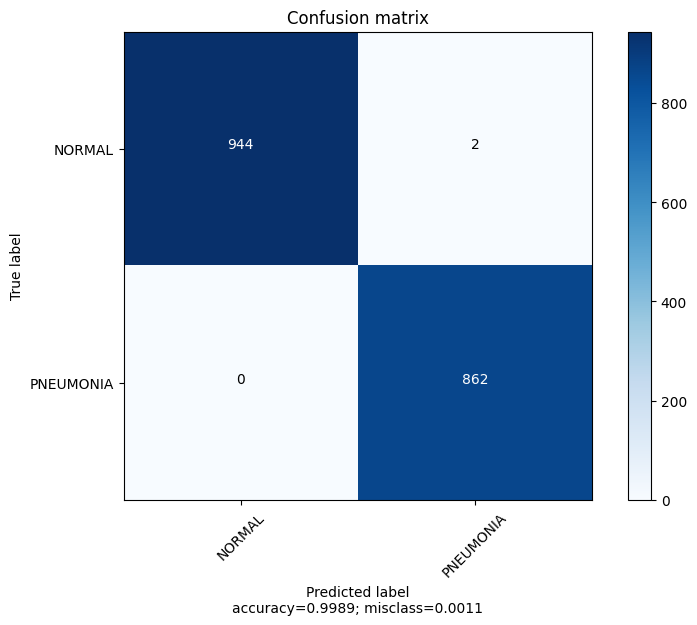

In [ ]:
confusion_mtx = confusion_matrix(y_test_new2,pred)
cm = plot_confusion_matrix(confusion_mtx, target_names = labels, normalize=False)

### **RoC Curve**

57/57 [==============================] - 0s 7ms/step


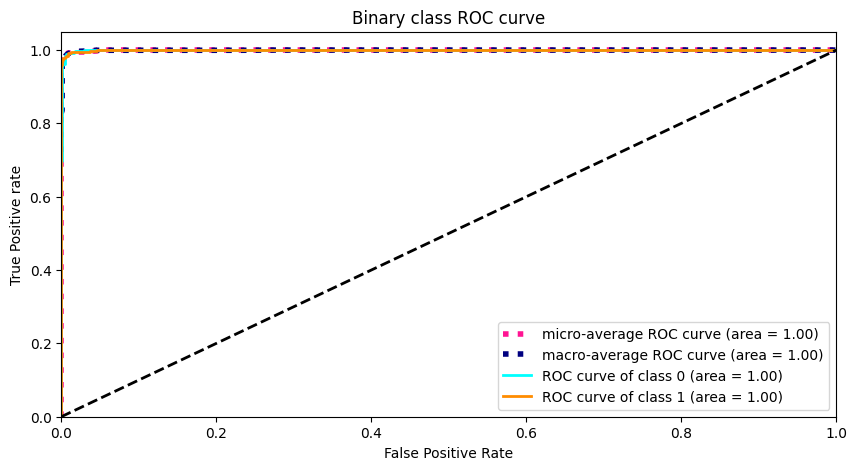

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle

pred = cnn_model.predict(X_test2)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_new2, pred[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_new2, pred[:,i],pos_label = i)    
# Compute micro-average ROC curve and ROC area

roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_class):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_class

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure(figsize = (10,5))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_class), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Binary class ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/Project/Chest_X-ray/Implementation/Saved_Models/CNN_model_2_ROC_1',dpi = 400);

## **Model: Pre-trained - EfficientNetB1**

In [ ]:
#load pre-trained EfficientNet weights
effnet = EfficientNetB1(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

In [ ]:
#adding custom layers at the top of the classifier
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(2,activation='sigmoid')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['normalization[0][0]']    

In [ ]:
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/DNN/Chest_X-ray/Implementation/Saved_Models/effnetb1.h5",
                             monitor="val_loss",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)

### **Training The Model**

In [ ]:
history = model.fit(X_train2,y_train2,validation_split=0.1, shuffle = True, epochs = 100, verbose=1, batch_size=32,callbacks=[reduce_lr])

### **Model Training and Validation Curves and Loss Curves**

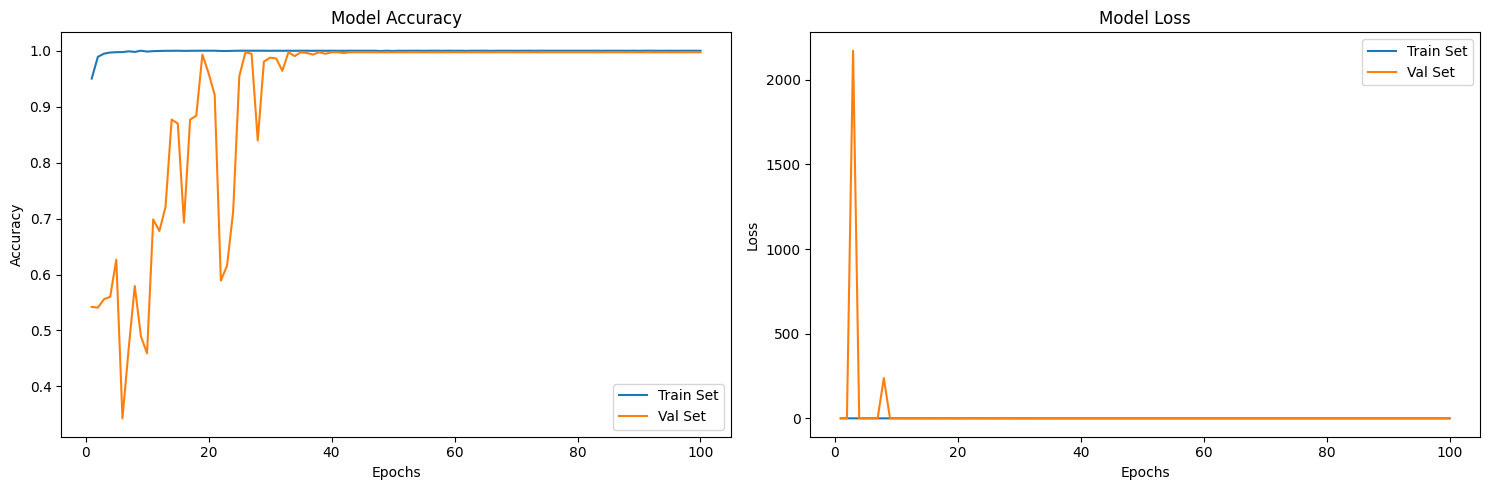

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

### **Prediction on Test Data**

In [ ]:
pred = model.predict(X_test2)
pred = np.argmax(pred,axis=1)
y_test_new2 = np.argmax(y_test2,axis=1)

57/57 [==============================] - 3s 21ms/step


### **Evaluation on Test Data**

In [ ]:
loss,acc = model.evaluate(X_test2,y_test2,verbose = 1)
print("Test Accuracy: ",np.round(acc*100,2))

57/57 [==============================] - 1s 23ms/step - loss: 0.0171 - accuracy: 0.9961
Test Accuracy:  99.61


In [ ]:
print(classification_report(y_test_new2,pred,target_names = labels, digits = 4))

              precision    recall  f1-score   support

      NORMAL     0.9968    0.9958    0.9963       946
   PNEUMONIA     0.9954    0.9965    0.9959       862

    accuracy                         0.9961      1808
   macro avg     0.9961    0.9961    0.9961      1808
weighted avg     0.9961    0.9961    0.9961      1808



### **Confusion Matrix**

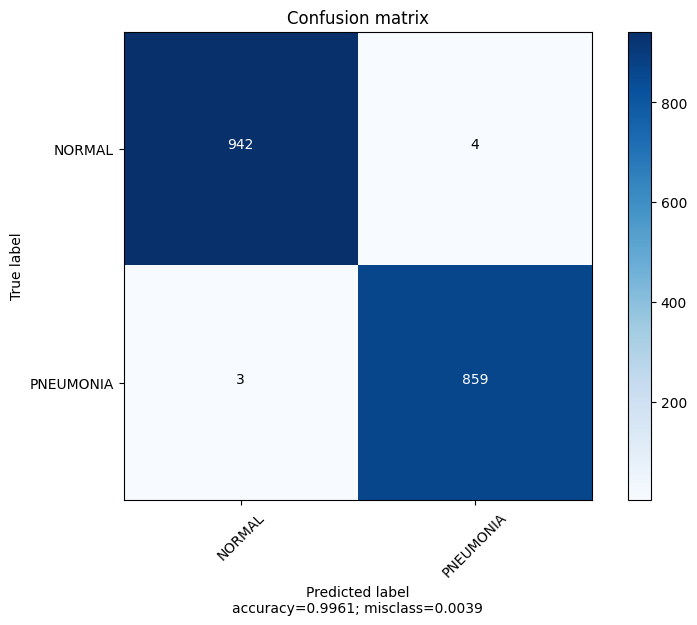

In [ ]:
confusion_mtx = confusion_matrix(y_test_new2,pred)
cm = plot_confusion_matrix(confusion_mtx, target_names = labels, normalize=False)

### **RoC Curve**

57/57 [==============================] - 0s 7ms/step


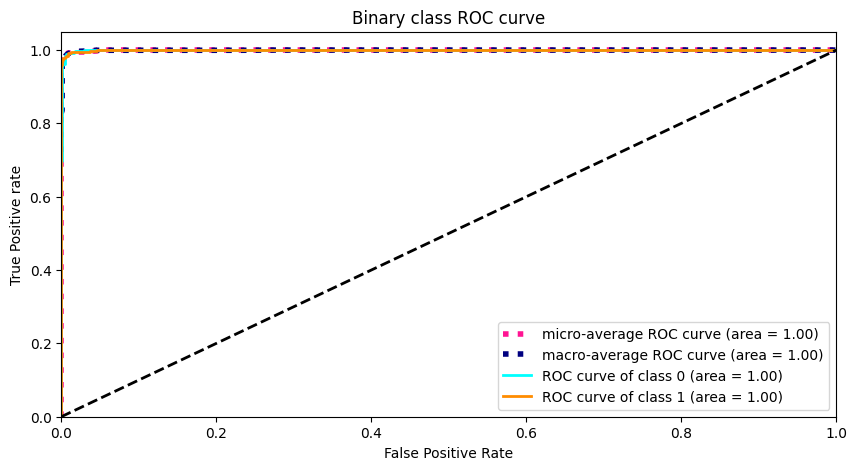

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle

pred = cnn_model.predict(X_test2)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_new2, pred[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_new2, pred[:,i],pos_label = i)    
# Compute micro-average ROC curve and ROC area

roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_class):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_class

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure(figsize = (10,5))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_class), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Binary class ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/Project/Chest_X-ray/Implementation/Saved_Models/CNN_model_2_ROC_1',dpi = 400);

## **Model: Fine Tuned Pre-trained - VGG-16** 

In [ ]:
# Defining and Laoding the pretrained VGG16 model
np.random.seed(42)
base_model = VGG16( weights='imagenet',include_top=False, input_shape=(224,224,3))

In [ ]:
#printing layers of the model
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# finetunning - freezing early 8 layers and training later layers of the model
for layer in base_model.layers[:8]:
    layer.trainable = False
for layer in base_model.layers[8:]:
    layer.trainable = True

In [ ]:
# adding custom layers at the top of the pretrained classifier
NUM_CLASSES = 2
model2 = Sequential()
model2.add(base_model)
model2.add(Flatten())
model2.add(Dense(1024, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(NUM_CLASSES, activation='sigmoid'))

In [ ]:
# compiling the model
model2.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-4),metrics=['accuracy'])
model2.summary()

In [ ]:
callback = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0,mode='auto', baseline=None, restore_best_weights=False)

### **Training of the model**

In [ ]:
epochs = 50
history = model2.fit(X_train2, y_train2, validation_split = 0.1 , epochs = epochs, verbose = 1, batch_size = 32, callbacks = callback)

Epoch 1/50
204/204 [==============================] - 12s 46ms/step - loss: 0.3590 - accuracy: 0.8147 - val_loss: 0.2926 - val_accuracy: 0.8963
Epoch 2/50
204/204 [==============================] - 7s 37ms/step - loss: 0.1257 - accuracy: 0.9513 - val_loss: 0.1002 - val_accuracy: 0.9696
Epoch 3/50
204/204 [==============================] - 8s 37ms/step - loss: 0.0714 - accuracy: 0.9756 - val_loss: 0.0739 - val_accuracy: 0.9820
Epoch 4/50
204/204 [==============================] - 8s 37ms/step - loss: 0.0606 - accuracy: 0.9783 - val_loss: 0.0525 - val_accuracy: 0.9889
Epoch 5/50
204/204 [==============================] - 7s 37ms/step - loss: 0.0374 - accuracy: 0.9886 - val_loss: 0.0593 - val_accuracy: 0.9876
Epoch 6/50
204/204 [==============================] - 8s 37ms/step - loss: 0.0258 - accuracy: 0.9911 - val_loss: 0.0533 - val_accuracy: 0.9903
Epoch 7/50
204/204 [==============================] - 7s 37ms/step - loss: 0.0253 - accuracy: 0.9909 - val_loss: 0.0401 - val_accuracy: 0.993

In [ ]:
#Saving the trained model
model2.save('/content/drive/MyDrive/DNN/Chest_X-ray/Implementation/Saved_Models/vgg16.h5')

### **Model Training and Validation Curves and Loss Curves**

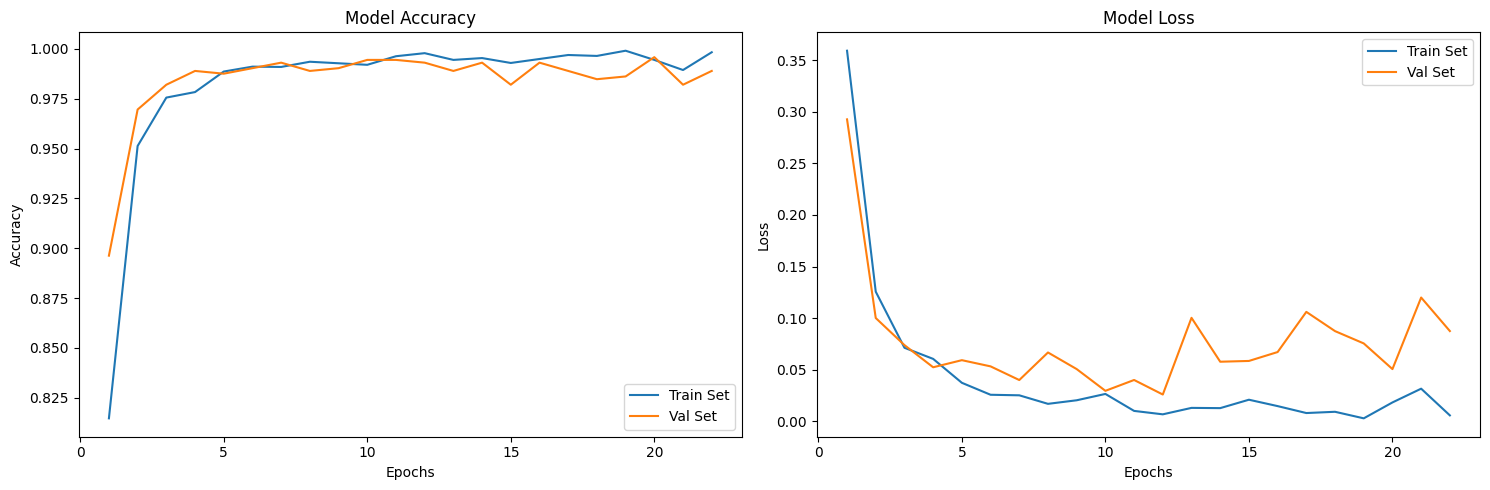

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

### **Prediction on Test Data**

In [ ]:
pred = model2.predict(X_test2)
pred = np.argmax(pred,axis=1)
y_test_new2 = np.argmax(y_test2,axis=1)

57/57 [==============================] - 2s 31ms/step


### **Evaluation on Test Data**

In [ ]:
loss,acc = model2.evaluate(X_test2,y_test2,verbose = 1)
print("Test Accuracy: ",np.round(acc*100,2))

57/57 [==============================] - 1s 23ms/step - loss: 0.0569 - accuracy: 0.9851
Test Accuracy:  98.51


In [ ]:
print(classification_report(y_test_new2,pred,target_names = labels, digits = 4))

              precision    recall  f1-score   support

      NORMAL     0.9852    0.9863    0.9857       946
   PNEUMONIA     0.9849    0.9838    0.9843       862

    accuracy                         0.9851      1808
   macro avg     0.9851    0.9850    0.9850      1808
weighted avg     0.9851    0.9851    0.9851      1808



### **Confusion Matrix**

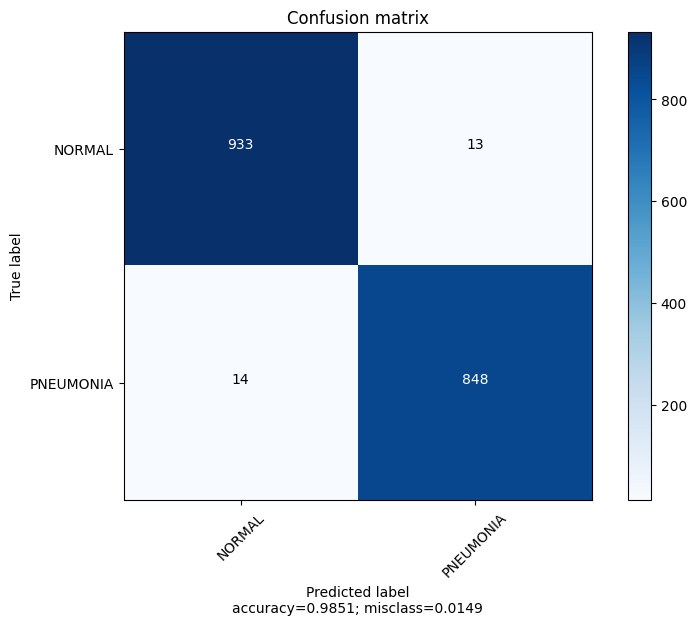

In [ ]:
confusion_mtx = confusion_matrix(y_test_new2,pred)
cm = plot_confusion_matrix(confusion_mtx, target_names = labels, normalize=False)

### **RoC Curve**

57/57 [==============================] - 0s 7ms/step


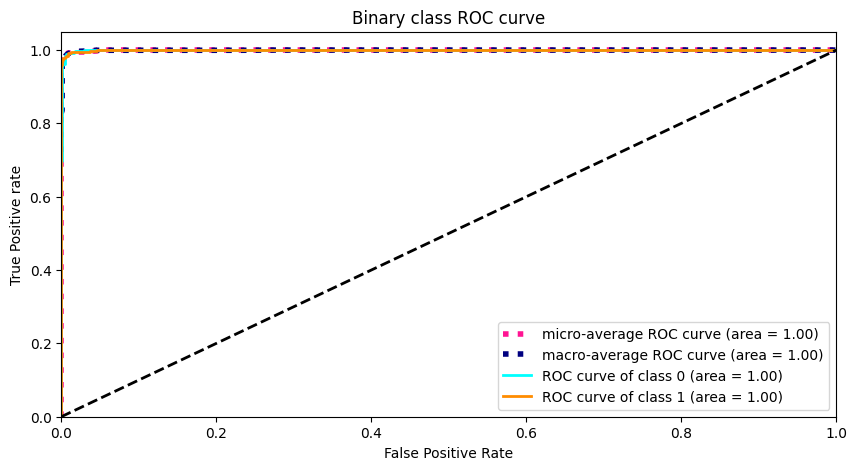

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle

pred = cnn_model.predict(X_test2)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_new2, pred[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_new2, pred[:,i],pos_label = i)    
# Compute micro-average ROC curve and ROC area

roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_class):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_class

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure(figsize = (10,5))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_class), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Binary class ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/Project/Chest_X-ray/Implementation/Saved_Models/CNN_model_2_ROC_1',dpi = 400);

## **Model: Fine Tuned Pre-trained - DenseNet121**

In [ ]:
#Defining and Loading pretrained DenseNet121 model
densenet_model = DenseNet121(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [ ]:
#Printing all layers of the pretrained model
for i, layer in enumerate(densenet_model.layers):
    print(i, layer.name)

In [ ]:
for layer in densenet_model.layers:
    layer.trainable = False

In [ ]:
# finetunning - freezing early 141 layers and training later layers of the model
for layer in densenet_model.layers[:141]:
    layer.trainable = False
for layer in densenet_model.layers[141:]:
    layer.trainable = True

In [ ]:
#adding custom layers at the top of the model
NUM_CLASSES = 2
model = Sequential()
model.add(densenet_model)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='sigmoid'))

In [ ]:
# Compiling the model
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-3),metrics=['accuracy'])
model.summary()

### **Training of the Model**

In [ ]:
epochs = 50
history = model.fit(X_train2, y_train2, validation_split = 0.1 , batch_size = 16, epochs = epochs, verbose = 1)

Epoch 1/50
407/407 [==============================] - 32s 48ms/step - loss: 0.1187 - accuracy: 0.9600 - val_loss: 0.0409 - val_accuracy: 0.9931
Epoch 2/50
407/407 [==============================] - 15s 37ms/step - loss: 0.0545 - accuracy: 0.9813 - val_loss: 0.0356 - val_accuracy: 0.9889
Epoch 3/50
407/407 [==============================] - 15s 36ms/step - loss: 0.0506 - accuracy: 0.9829 - val_loss: 0.0216 - val_accuracy: 0.9931
Epoch 4/50
407/407 [==============================] - 15s 37ms/step - loss: 0.0374 - accuracy: 0.9880 - val_loss: 0.0141 - val_accuracy: 0.9972
Epoch 5/50
407/407 [==============================] - 15s 37ms/step - loss: 0.0261 - accuracy: 0.9917 - val_loss: 0.0517 - val_accuracy: 0.9931
Epoch 6/50
407/407 [==============================] - 15s 36ms/step - loss: 0.0304 - accuracy: 0.9886 - val_loss: 0.0313 - val_accuracy: 0.9945
Epoch 7/50
407/407 [==============================] - 15s 36ms/step - loss: 0.0156 - accuracy: 0.9943 - val_loss: 0.0305 - val_accuracy:

In [ ]:
#Saving the trained model
model.save('/content/drive/MyDrive/DNN/Chest_X-ray/Implementation/Saved_Models/densenet121.h5')

### **Model Training and Validation Curves and Loss Curves**

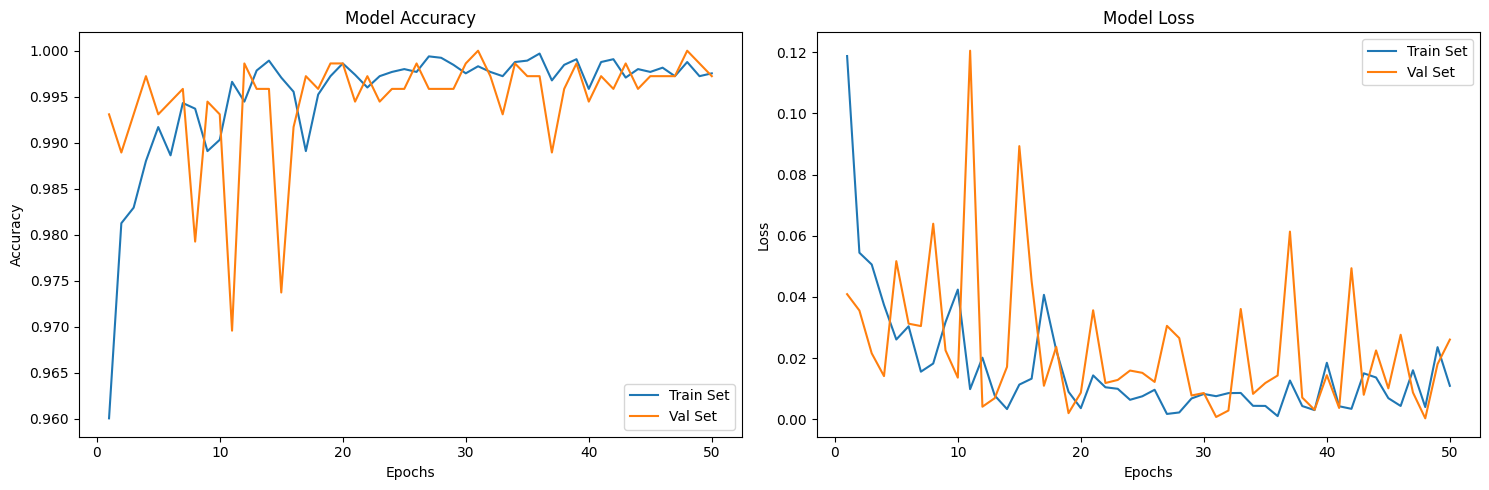

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

### **Prediction on Test Data**

In [ ]:
pred = model.predict(X_test2)
pred = np.argmax(pred,axis=1)
y_test_new2 = np.argmax(y_test2,axis=1)

57/57 [==============================] - 3s 19ms/step


### **Evaluation on Test Data**

In [ ]:
loss,acc = model.evaluate(X_test2,y_test2,verbose = 1)
print("Test Accuracy: ",np.round(acc*100,2))

57/57 [==============================] - 1s 22ms/step - loss: 0.0283 - accuracy: 0.9934
Test Accuracy:  99.34


In [ ]:
print(classification_report(y_test_new2,pred,target_names = labels, digits = 4))

              precision    recall  f1-score   support

      NORMAL     0.9905    0.9968    0.9937       946
   PNEUMONIA     0.9965    0.9896    0.9930       862

    accuracy                         0.9934      1808
   macro avg     0.9935    0.9932    0.9933      1808
weighted avg     0.9934    0.9934    0.9934      1808



### **Confusion Matrix**

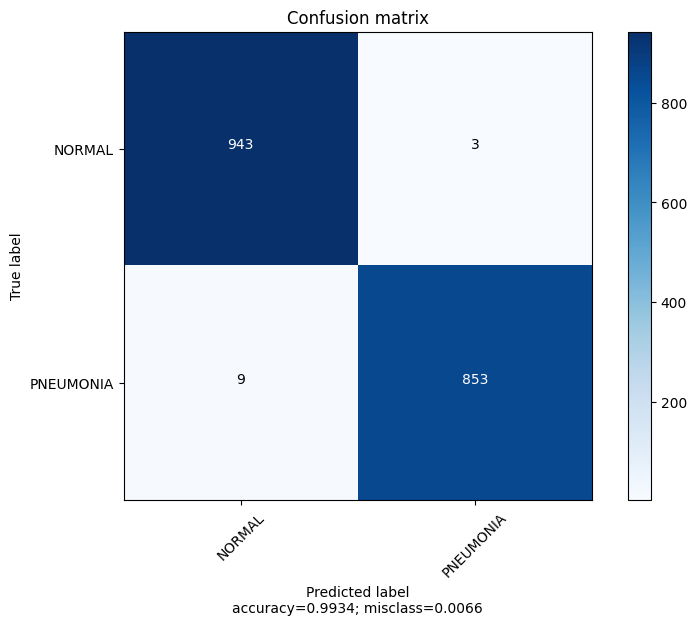

In [ ]:
confusion_mtx = confusion_matrix(y_test_new2,pred)
cm = plot_confusion_matrix(confusion_mtx, target_names = labels, normalize=False)

### **RoC Curve**

57/57 [==============================] - 0s 7ms/step


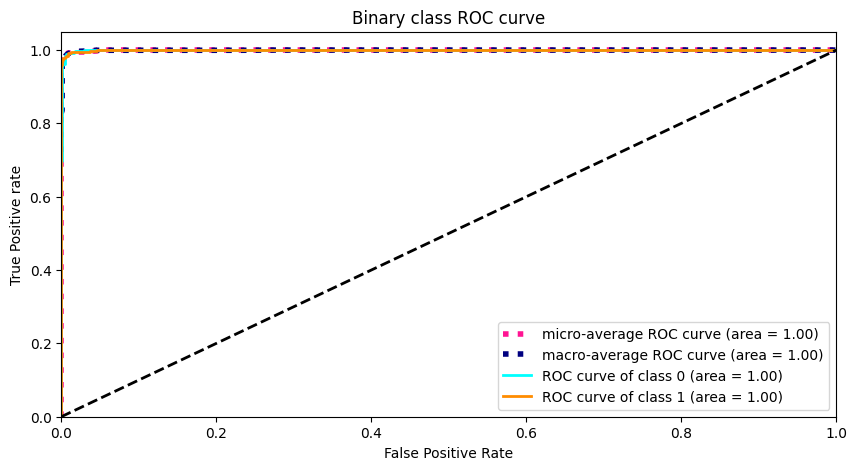

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle

pred = cnn_model.predict(X_test2)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_new2, pred[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_new2, pred[:,i],pos_label = i)    
# Compute micro-average ROC curve and ROC area

roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_class):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_class

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure(figsize = (10,5))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_class), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Binary class ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/Project/Chest_X-ray/Implementation/Saved_Models/CNN_model_2_ROC_1',dpi = 400);

##**Application Phase**

In [ ]:
#Loading Un-seen Image For images
#img_path = '/content/drive/MyDrive/DNN/Chest_X-ray/Data_APP_Phase/PNEUMONIA.jpg'
# For NORMAL
img_path = '/content/drive/MyDrive//DNN/Chest_X-ray/Data_APP_Phase/NORMAL.jpg'

In [ ]:
#Loading and Pre-Processing Image
image_size = 224
image = cv2.imread(img_path)
#image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image = cv2.resize(image,(image_size, image_size))
image_array = np.array(image)

In [ ]:
#Load the best saved trained model
best_model = load_model('/content/drive/MyDrive/DNN/Chest_X-ray/Implementation/Saved_Models/resnet50_model.h5')

### **Prediction on Unseen Instance**

In [ ]:
# Making prediction on Unseen Image using Trained model
image_array = np.expand_dims(image_array, axis=0)
prediction = best_model.predict(image_array)
prediction = np.argmax(prediction,axis=1)
print(prediction)

In [ ]:
#Ploting the predictions
if prediction[0] == 0:
  print('\033[1m',"\n\nTrained Model Prediction")
  print('\033[1m',"+","="*30,"+")
  print('\033[1m',"|"," "*30,"|\n           Class : Normal Image         \n","     |                            |")
  print('\033[1m',"+","="*30,"+")
  plt.imshow(image)
  plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
  plt.show()

else:
  print('\033[1m',"\n\nTrained Model Prediction")
  print('\033[1m',"+","="*30,"+")
  print('\033[1m',"|"," "*30,"|\n           Class : Pneumonia Image       \n","|                            |")
  print('\033[1m',"+","="*30,"+")
  plt.imshow(image)
  plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
  plt.show()